In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import time


In [2]:
def make_spectrogram(file_path):
    data, sampling_rate = librosa.load(file_path)
    out=librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    return out

In [3]:
path="/Users/ugur/Desktop/UrbansoundProject/UrbanSound8K/"


In [4]:
metadata=pd.read_csv(path+"metadata/UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [7]:
fold_number=np.array(metadata["fold"])
file_name=np.array(metadata["slice_file_name"])
class_name=np.array(metadata["class"])

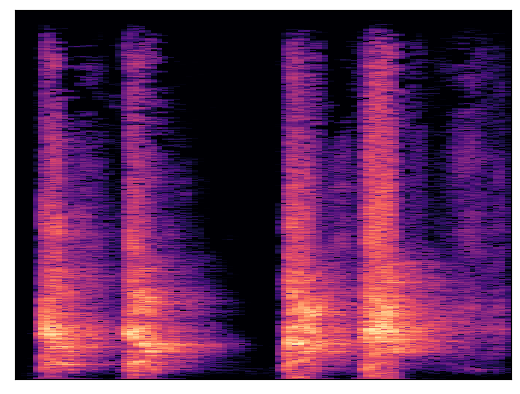

In [8]:
testpath="/Users/ugur/Desktop/UrbansoundProject/UrbanSound8K/audio/fold6/208030-3-0-0.wav"
testim=make_spectrogram(testpath)
librosa.display.specshow(testim)

In [9]:
audio_path=path+"audio"
print(audio_path)
print(len(file_name))

/Users/ugur/Desktop/UrbansoundProject/UrbanSound8K/audio
8732


In [ ]:
for i in range(len(file_name)):
    file_path=audio_path + "/fold" +str(fold_number[i]) + "/" +file_name[i]
    fig=plt.figure()
    librosa.display.specshow(make_spectrogram(file_path))
    fig.savefig(file_path[:-3]+"png")
    plt.close(fig)
    #print(i) 
    time.sleep(0.005)

    


In [ ]:
#check
for i in range(len(file_name)):
    file_path=audio_path + "/fold" +str(fold_number[i]) + "/" +file_name[i]
    if not os.path.exists(file_path[:-3]+"png"):
        print(f"Fail {file_path}")
    #else:
    #    print(f"Succes{file_path[:-3]}png")